In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import files
uploaded = files.upload()

Saving city_day.csv to city_day.csv
Saving Real_Combine.csv to Real_Combine.csv


In [6]:
data = pd.read_csv('city_day.csv')

In [ ]:
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [7]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [8]:
data.shape

(29531, 16)

In [ ]:
#Visualisation for states with highest pollutants

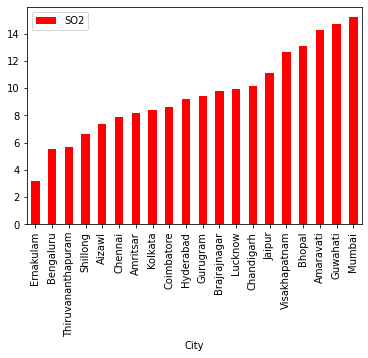

In [9]:
data[['SO2','City']].groupby(["City"]).mean().sort_values(by='SO2').head(20).plot.bar(color='r')
plt.show()

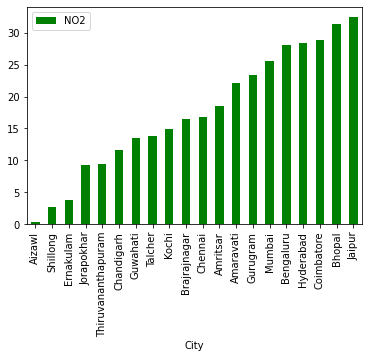

In [10]:
data[['NO2','City']].groupby(["City"]).mean().sort_values(by='NO2').head(20).plot.bar(color='g')
plt.show()

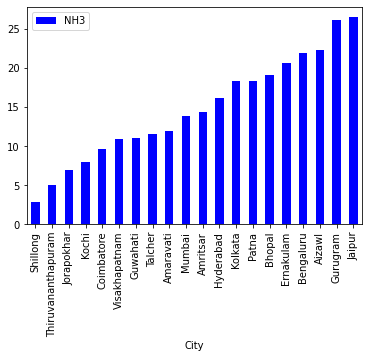

In [11]:
data[['NH3','City']].groupby(["City"]).mean().sort_values(by='NH3').head(20).plot.bar(color='b')
plt.show()

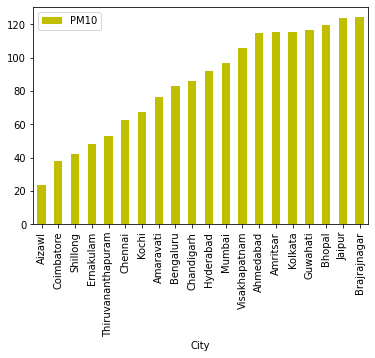

In [12]:
data[['PM10','City']].groupby(["City"]).mean().sort_values(by='PM10').head(20).plot.bar(color='y')
plt.show()

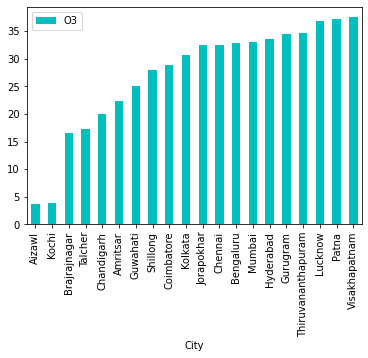

In [13]:
data[['O3','City']].groupby(["City"]).mean().sort_values(by='O3').head(20).plot.bar(color='c')
plt.show()

In [14]:
data.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [15]:
total = data.isnull().sum().sort_values(ascending=False)

In [16]:
total.head()

Xylene     18109
PM10       11140
NH3        10328
Toluene     8041
Benzene     5623
dtype: int64

In [17]:
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)

In [18]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [19]:
missing_data.head()

,Total,Percent
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008


Text(0.5, 1.0, 'Percent missing data by feature')

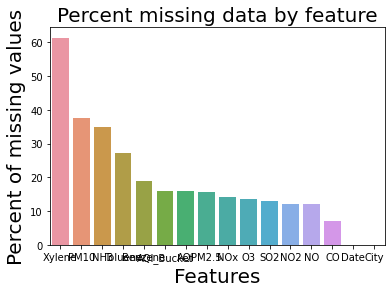

In [20]:
sns.barplot(x=missing_data.index, y=missing_data['Percent']) #percent of missing values
plt.xlabel('Features', fontsize=20)
plt.ylabel('Percent of missing values', fontsize=20)
plt.title('Percent missing data by feature', fontsize=20)

In [21]:
data.drop(['PM10', 'NO', 'NOx', 'CO','O3', 'Benzene', 'Toluene', 'Xylene', 'AQI_Bucket'],axis=1,inplace=True) #dropping unnecessary columns

In [22]:
total1 = data.isnull().sum().sort_values(ascending=False)

In [23]:
total1.head()

NH3      10328
AQI       4681
PM2.5     4598
SO2       3854
NO2       3585
dtype: int64

In [24]:
percent1 = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)

In [25]:
missing_data = pd.concat([total1, percent], axis=1, keys=['Total', 'Percent'])

In [26]:
missing_data.head()

,Total,Percent
NH3,10328.0,34.973418
AQI,4681.0,15.851139
PM2.5,4598.0,15.570079
SO2,3854.0,13.050692
NO2,3585.0,12.139785


Text(0.5, 1.0, 'Percent missing data by feature')

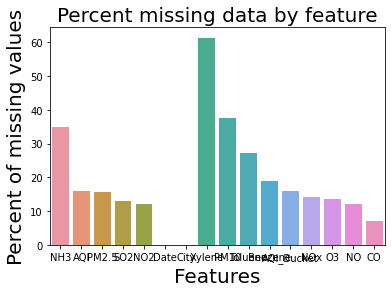

In [27]:
sns.barplot(x=missing_data.index, y=missing_data['Percent']) #percent of missing values
plt.xlabel('Features', fontsize=20)
plt.ylabel('Percent of missing values', fontsize=20)
plt.title('Percent missing data by feature', fontsize=20)

In [28]:
data.columns

Index(['City', 'Date', 'PM2.5', 'NO2', 'NH3', 'SO2', 'AQI'], dtype='object')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([25946.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([   0.,  400.,  800., 1200., 1600., 2000., 2400., 2800., 3200.,
        3600., 4000.]),
 <a list of 10 Patch objects>)

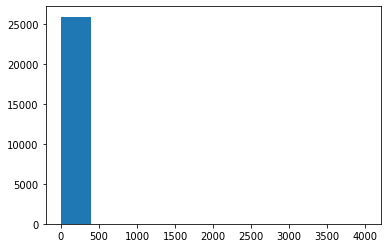

In [29]:
plt.hist(data.NO2,range=(0.0,4000))   #DataDistribution

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([25393.,   284.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

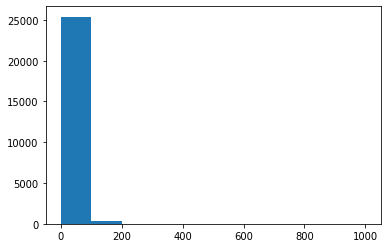

In [30]:
plt.hist(data.SO2,range=(0,1000))

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([9343., 9009., 2790., 2359.,  804.,  239.,   88.,   56.,   38.,
          31.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

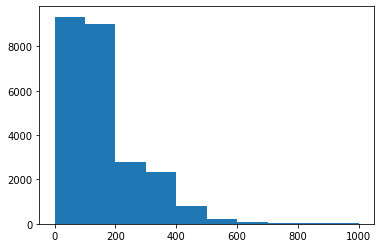

In [31]:
plt.hist(data.AQI,range=(0,1000))

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.8843e+04, 3.0500e+02, 4.7000e+01, 8.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

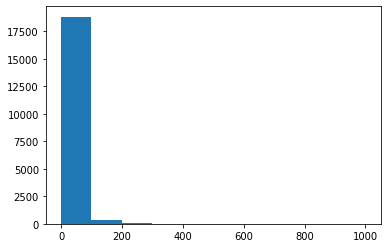

In [32]:
plt.hist(data.NH3,range=(0,1000))

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

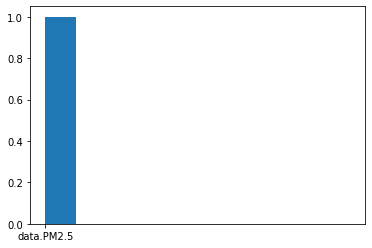

In [33]:
plt.hist('data.PM2.5',range=(0,1000)) #pm2_5

In [34]:
#no potential outliers

In [35]:
grp_state = data.groupby('City')    #filling missing values by mean (grouping by state)

In [36]:
def impute_mean_by_state(series):
    return series.fillna(series.mean())

In [37]:
data.columns

Index(['City', 'Date', 'PM2.5', 'NO2', 'NH3', 'SO2', 'AQI'], dtype='object')

In [38]:
data['PM2.5']=grp_state['PM2.5'].transform(impute_mean_by_state)  #fill value with mean value group by state
data['NO2']=grp_state['NO2'].transform(impute_mean_by_state)
data['SO2']=grp_state['SO2'].transform(impute_mean_by_state)
data['AQI']=grp_state['AQI'].transform(impute_mean_by_state)

In [39]:
data.describe()

,PM2.5,NO2,NH3,SO2,AQI
count,29531.000000,29531.000000,19203.000000,29531.000000,29531.000000
mean,66.234841,28.641768,23.483476,15.639939,169.486556
std,60.378014,23.595832,25.684275,18.101663,137.698081
min,0.040000,0.010000,0.010000,0.010000,13.000000
25%,31.830000,12.380000,8.580000,6.070000,87.000000
50%,50.059571,23.240000,15.850000,9.949676,119.000000
75%,76.345000,37.420000,30.020000,15.945000,215.000000
max,949.990000,362.210000,352.890000,193.860000,2049.000000


In [40]:
data.isna().sum()

City         0
Date         0
PM2.5        0
NO2          0
NH3      10328
SO2          0
AQI          0
dtype: int64

(array([29531.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([   0.,  400.,  800., 1200., 1600., 2000., 2400., 2800., 3200.,
        3600., 4000.]),
 <a list of 10 Patch objects>)

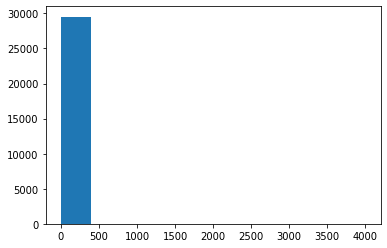

In [41]:
plt.hist(data.NO2,range=(0.0,4000))  #data distribution after replacing null values with mean

(array([29531.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([   0.,  400.,  800., 1200., 1600., 2000., 2400., 2800., 3200.,
        3600., 4000.]),
 <a list of 10 Patch objects>)

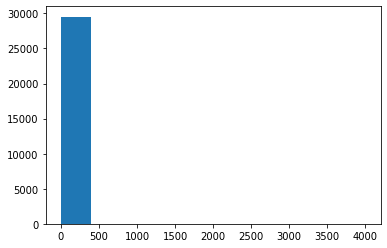

In [44]:
plt.hist(data.SO2,range=(0,4000))

(array([2.9438e+04, 9.2000e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000.]),
 <a list of 10 Patch objects>)

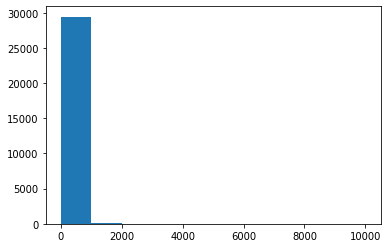

In [43]:
plt.hist(data.AQI,range=(0,10000))

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

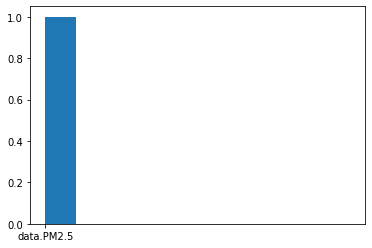

In [45]:
plt.hist('data.PM2.5',range=(0,1000)) #pm2_5

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

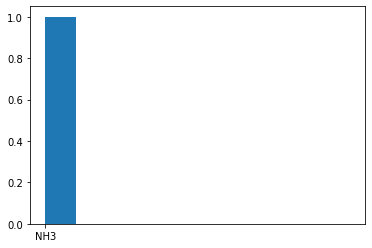

In [46]:
plt.hist('NH3',range=(0,1000)) 

In [47]:
data.tail(10)

,City,Date,PM2.5,NO2,NH3,SO2,AQI
29521,Visakhapatnam,2020-06-22,33.17,42.45,13.70,13.65,95.0
29522,Visakhapatnam,2020-06-23,25.40,34.09,13.13,10.40,100.0
29523,Visakhapatnam,2020-06-24,34.36,23.38,14.45,10.92,86.0
29524,Visakhapatnam,2020-06-25,13.45,21.60,12.27,8.19,77.0
29525,Visakhapatnam,2020-06-26,7.63,23.27,11.15,6.87,47.0
29526,Visakhapatnam,2020-06-27,15.02,25.06,12.47,8.55,41.0
29527,Visakhapatnam,2020-06-28,24.38,26.06,11.99,12.72,70.0
29528,Visakhapatnam,2020-06-29,22.91,29.53,10.71,8.42,68.0
29529,Visakhapatnam,2020-06-30,16.64,29.26,10.03,9.84,54.0
29530,Visakhapatnam,2020-07-01,15.00,26.85,5.20,2.10,50.0


In [48]:
data.columns

Index(['City', 'Date', 'PM2.5', 'NO2', 'NH3', 'SO2', 'AQI'], dtype='object')

In [49]:
df = pd.read_csv('Real_Combine.csv')

In [50]:
df.head()

,T,TM,Tm,H,VV,V,VM,PM 2.5
0,14.7,21.0,10.0,76.0,0.6,3.0,11.1,313.22
1,14.4,15.0,13.0,91.0,1.4,6.1,16.5,186.18
2,14.0,17.0,11.0,91.0,0.6,4.8,13.0,87.18
3,9.1,12.0,6.0,91.0,0.5,6.7,13.0,217.87
4,8.4,10.0,7.0,95.0,0.5,5.7,11.1,229.9


In [51]:
sum(df.isnull().any())

1

In [52]:
df.tail()

,T,TM,Tm,H,VV,V,VM,PM 2.5
921,12.2,16.4,8.9,93.0,0.6,8.0,13.0,249.87
922,8.2,15.0,5.4,97.0,0.6,11.3,14.8,166.71
923,8.0,11.6,5.6,90.0,0.8,7.8,13.0,196.97
924,8.6,12.0,4.2,84.0,0.8,4.6,11.1,240.07
925,9.0,14.0,5.0,80.0,0.6,4.1,13.0,NaN


In [53]:
df = df.dropna()

In [54]:
df.tail()

,T,TM,Tm,H,VV,V,VM,PM 2.5
920,10.8,15.4,8.0,95.0,0.2,4.3,16.5,316.09
921,12.2,16.4,8.9,93.0,0.6,8.0,13.0,249.87
922,8.2,15.0,5.4,97.0,0.6,11.3,14.8,166.71
923,8.0,11.6,5.6,90.0,0.8,7.8,13.0,196.97
924,8.6,12.0,4.2,84.0,0.8,4.6,11.1,240.07


In [55]:
df.drop(index = 486, inplace = True)

In [56]:
df[486:488]

,T,TM,Tm,H,VV,V,VM,PM 2.5
487,31.5,36.0,27.0,67.0,4.0,9.8,14.8,26.54
488,31.6,36.0,27.0,68.0,4.0,12.8,16.5,30.12


In [57]:
df.isnull().sum()

T         0
TM        0
Tm        0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [58]:
X = df.iloc[:,:-1] ## independent features
y = df.iloc[:,:-1] ## dependent features

In [59]:
print(X)

        T    TM    Tm     H   VV     V    VM
0    14.7  21.0  10.0  76.0  0.6   3.0  11.1
1    14.4  15.0  13.0  91.0  1.4   6.1  16.5
2    14.0  17.0  11.0  91.0  0.6   4.8  13.0
3     9.1  12.0   6.0  91.0  0.5   6.7  13.0
4     8.4  10.0   7.0  95.0  0.5   5.7  11.1
..    ...   ...   ...   ...  ...   ...   ...
920  10.8  15.4   8.0  95.0  0.2   4.3  16.5
921  12.2  16.4   8.9  93.0  0.6   8.0  13.0
922   8.2  15.0   5.4  97.0  0.6  11.3  14.8
923   8.0  11.6   5.6  90.0  0.8   7.8  13.0
924   8.6  12.0   4.2  84.0  0.8   4.6  11.1

[923 rows x 7 columns]


In [60]:
print(y)

0      313.22
1      186.18
2       87.18
3      217.87
4       229.9
        ...  
920    316.09
921    249.87
922    166.71
923    196.97
924    240.07
Name: PM 2.5, Length: 923, dtype: object


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)  #70-30

In [93]:
X_test.shape, y_test.shape

((277, 7), (277,))

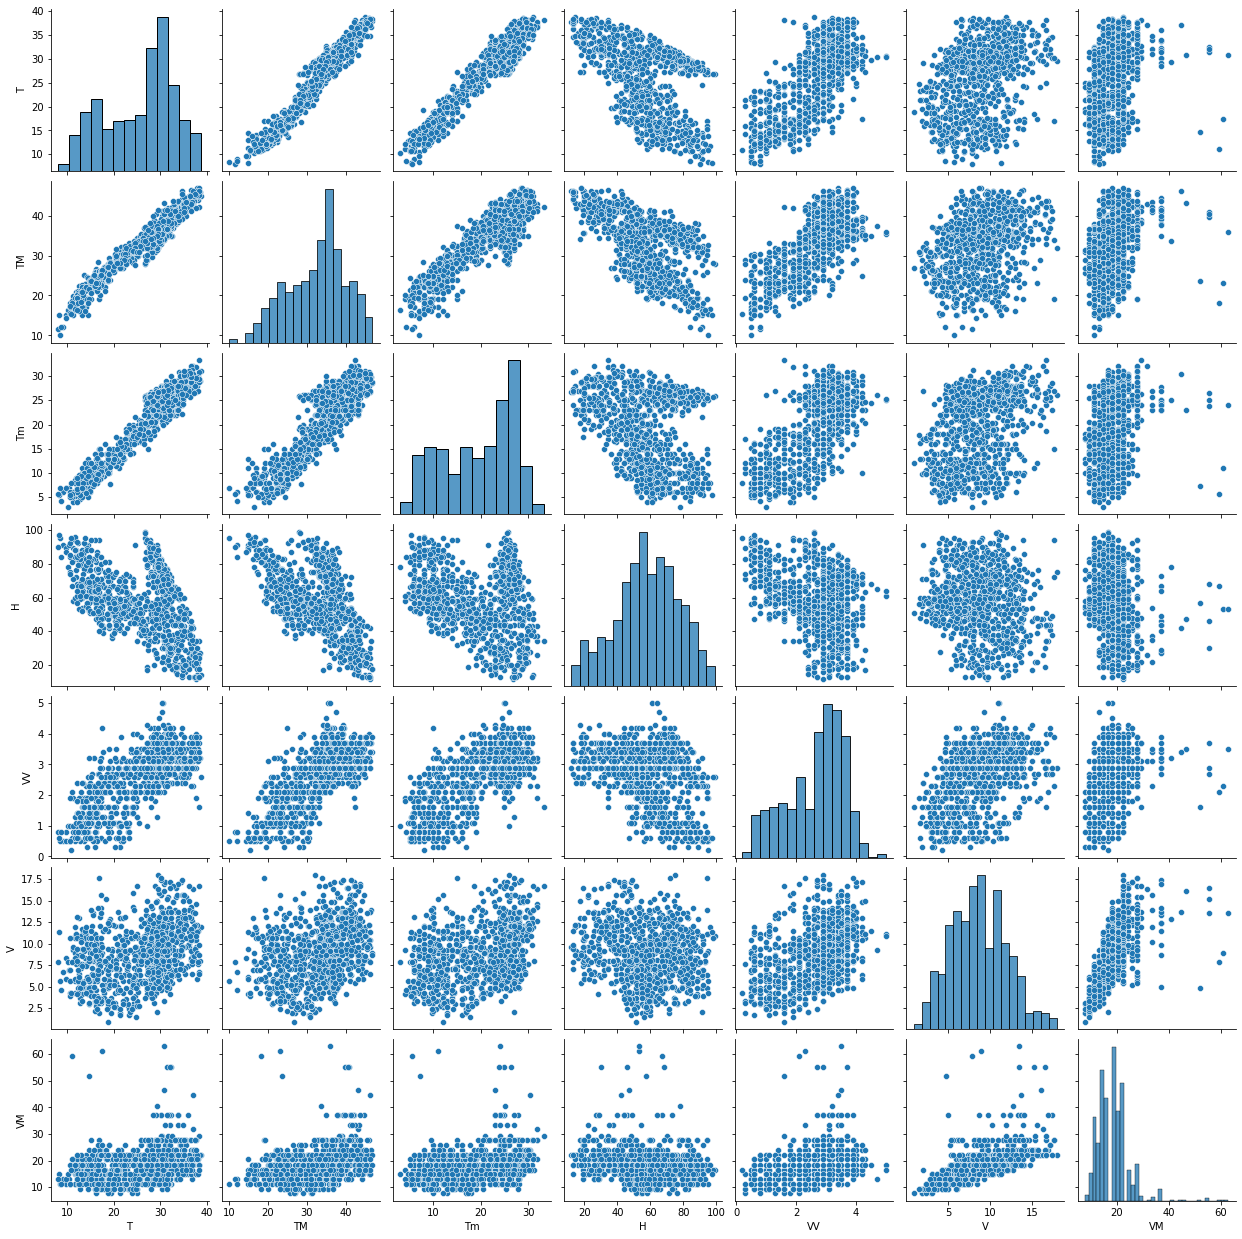

In [91]:
sns.pairplot(df)  #visualize relationships between each variable

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


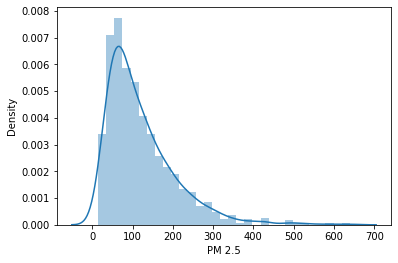

In [100]:
sns.distplot(y.astype(float))

In [88]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
dtree = DecisionTreeRegressor(criterion="mse")

In [94]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [95]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [ ]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

In [98]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

In [99]:
score.mean()

0.3352937607061368

In [111]:
dtree.predict([[14.7,21.0,10.0,76.0,0.6,3.0,11.1]])

array([313.22])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


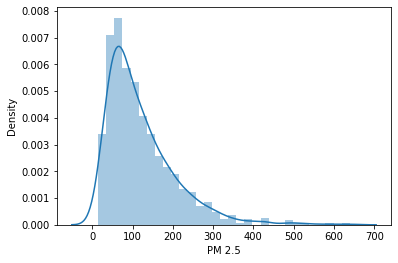

In [101]:
sns.distplot(y.astype(float))

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [104]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9610220633231085


In [105]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.7714354305945414


In [106]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [107]:
score.mean()

0.6394743773333713

In [108]:
regressor.predict(X_test)

array([100.7282, 255.4704,  35.1734, 220.0501,  74.2533, 105.6895,
       102.2049, 167.4615, 140.5722,  84.7717,  61.179 , 199.9323,
        72.3593,  89.7423,  84.361 ,  58.6351, 149.6091, 224.3899,
       135.4548,  30.0007,  97.9309,  96.3231, 158.2194, 186.2563,
        41.2381, 113.3351,  93.4893,  43.7222, 194.3505,  68.7568,
        37.9149, 117.0048,  53.1251,  27.7995, 141.5029, 111.8878,
       105.8968, 100.5748, 121.1581, 284.4743, 108.9099, 115.3558,
       256.6977, 208.8467, 216.2372, 101.3584,  57.2969, 106.8005,
       179.7635, 189.3134, 209.9525, 137.1561,  46.6565, 113.9534,
        32.2489, 158.9032, 102.0036,  47.4675, 107.1261,  71.7805,
       357.8029,  47.9952,  86.3155, 222.0607, 290.6974,  40.3705,
        96.0341,  43.6174, 138.5994,  91.174 , 112.5811, 108.9889,
       218.9883, 194.8466,  94.3441,  44.601 ,  91.7507,  92.8006,
       232.4701, 260.6486, 160.4142, 265.2634, 289.5628,  86.3239,
       159.8807,  95.5381,  37.2416, 277.1385,  63.607 ,  75.2

In [110]:
regressor.predict([[14.7,21.0,10.0,76.0,0.6,3.0,11.1]])

array([306.2968])